In [1]:
from bs4 import BeautifulSoup

import urllib.parse
import urllib.request

import re
import ssl
import os

In [2]:
query_dict = {
  "aqt": "quiche lorraine",  # Query keywords - separated by a white space
  "dt": "platprincipal",       # Plate type : "entree", "platprincipal", "accompagnement", "amusegueule", "sauce" (optional)
  "exp": 2,                    # Plate price : 1 -> Cheap, 2 -> Medium, 3 -> Kind of expensive (optional)
  "dif": 2,                    # Recipe difficulty : 1 -> Very easy, 2 -> Easy, 3 -> Medium, 4 -> Advanced (optional)
  "veg": 0,                    # Vegetarien only : 0 -> False, 1 -> True (optional)
}

In [3]:
def get_soup_from_query(query_dict):
    base_url = "http://www.marmiton.org/recettes/recherche.aspx?"
    query_url = urllib.parse.urlencode(query_dict)

    url = base_url + query_url

    handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
    opener = urllib.request.build_opener(handler)
    response = opener.open(url)
    html_content = response.read()

    soup = BeautifulSoup(html_content, 'html.parser')
    search_data = []

    articles = soup.findAll("a", href=True)
    articles = [a for a in articles if a["href"].startswith("/recettes/recette_")]  
    fichier = articles[0]

    iterarticles = iter(articles)
    for article in iterarticles:
        data = {}
        try:
            data["name"] = article.find("h4").get_text().strip(' \t\n\r')
            data["url"] = article['href']
            try:
                data["rate"] = article.find("span").get_text().split("/")[0]
            except Exception as e0:
                pass
            try:
                data["image"] = article.find('img')['data-src']
            except Exception as e1:
                try:
                    data["image"] = article.find('img')['src']
                except Exception as e1:
                    pass
                pass
        except Exception as e2:
            pass
        if data:
            search_data.append(data)
        
    uri = search_data[0]['url']
    base_url = "http://www.marmiton.org"
    url = base_url + ("" if uri.startswith("/") else "/") + uri

    try:
        handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
        opener = urllib.request.build_opener(handler)
        response = opener.open(url)
        html_content = response.read()
    except urllib.error.HTTPError as e:
        raise RecipeNotFound if e.code == 404 else e

    soup = BeautifulSoup(html_content, 'html.parser')

    return soup


In [3]:
base_url = "http://www.marmiton.org/recettes/recherche.aspx?"
query_url = urllib.parse.urlencode(query_dict)

url = base_url + query_url

handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
opener = urllib.request.build_opener(handler)
response = opener.open(url)
html_content = response.read()

soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
search_data = []

articles = soup.findAll("a", href=True)
articles = [a for a in articles if a["href"].startswith("/recettes/recette_")]

In [5]:
iterarticles = iter(articles)
for article in iterarticles:
    data = {}
    try:
        data["name"] = article.find("h4").get_text().strip(' \t\n\r')
        data["url"] = article['href']
        try:
            data["rate"] = article.find("span").get_text().split("/")[0]
        except Exception as e0:
            pass
        try:
            data["image"] = article.find('img')['data-src']
        except Exception as e1:
            try:
                data["image"] = article.find('img')['src']
            except Exception as e1:
                pass
            pass
    except Exception as e2:
        pass
    if data:
        search_data.append(data)

In [6]:
search_data

[{'name': "Quiche lorraine au fromage d'ail et fines herbes",
  'url': '/recettes/recette_quiche-lorraine-au-fromage-d-ail-et-fines-herbes_57102.aspx',
  'rate': '4.5',
  'image': 'https://assets.afcdn.com/recipe/20100101/recipe_default_img_blurred_7_w190h190.webp'},
 {'name': 'Quiche lorraine à la québécoise',
  'url': '/recettes/recette_quiche-lorraine-a-la-quebecoise_41709.aspx',
  'rate': '4.5',
  'image': 'https://assets.afcdn.com/recipe/20181127/84323_w190h190c1cx1060cy707cxb2118cyb1412.webp'},
 {'name': 'Quiche jambon, fromage, tomate, olives',
  'url': '/recettes/recette_quiche-jambon-fromage-tomate-olives_535806.aspx',
  'rate': '0',
  'image': 'https://assets.afcdn.com/recipe/20230808/144579_w190h190c1cx3163cy1572cxb6240cyb4160.webp'},
 {'name': 'Raclette party :  4 idées recettes',
  'url': '/recettes/recette_raclette-party_535932.aspx',
  'rate': '0',
  'image': 'https://assets.afcdn.com/recipe/20231004/145704_w190h190c1cx2592cy1728cxb5184cyb3456.webp'}]

In [7]:
uri = search_data[0]['url']
print(uri)

/recettes/recette_quiche-lorraine-au-fromage-d-ail-et-fines-herbes_57102.aspx


In [8]:
base_url = "http://www.marmiton.org"
url = base_url + ("" if uri.startswith("/") else "/") + uri

try:
    handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
    opener = urllib.request.build_opener(handler)
    response = opener.open(url)
    html_content = response.read()
except urllib.error.HTTPError as e:
    raise RecipeNotFound if e.code == 404 else e

soup = BeautifulSoup(html_content, 'html.parser')

In [9]:
soup.find("h1").get_text().strip(' \t\n\r')

"Quiche lorraine au fromage d'ail et fines herbes"

In [10]:
soup.findAll("span", {"class": "ingredient-name"})
ingredient = [i.get_text().strip(' \t\n\r') for i in soup.findAll("span", {"class": "ingredient-name"})]
print(ingredient)

['pâte feuilletée', 'lardons', 'crème fraîche', 'oeufs', 'fromage ail et fines herbes']


In [11]:
soup.findAll("span", {"class": "card-ingredient-quantity"})
unit = [i.get_text().strip(' \t\n\r') for i in soup.findAll("span", {"class": "unit"})]
print(unit)
count = [i.get_text().strip(' \t\n\r') for i in soup.findAll("span", {"class": "count"})]
print(count)

['', 'g', 'g', '', 'cuillères à soupe']
['1', '200', '100', '5', '2']


In [27]:
input_element = soup.find("div", {"class": "mrtn-recette_ingredients-counter"})
nb = input_element.get('data-servingsnb')
#print('(pour ' + nb + ' personnes)')
print(input_element)
print(nb)

<div class="mrtn-recette_ingredients-counter" data-servingsnb="4" data-servingsunit="personnes">
</div>
4


In [25]:
soup.find("div", {"class": "mrtn-recette_ingredients-counter"})

<div class="mrtn-recette_ingredients-counter" data-servingsnb="4" data-servingsunit="personnes">
</div>

In [ ]:
<input class="recipe-ingredients__qt-counter__value title-5" type="text" value="4" min="1" max="50" aria-label="counter">

In [4]:
def set_quantities(soup,nb_pers):
    input_element = soup.find('input', class_='recipe-ingredients__qt-counter__value')
    nb = int(input_element.get('value'))

    count = [i.get_text().strip(' \t\n\r') for i in soup.findAll("span", {"class": "count"})]

    if nb != nb_pers:
        for i in range(len(count)):
            qu = count[i]
            qu=int(qu)
            count[i] = qu* nb_pers/nb

    return count


In [6]:
set_quantities(soup,8)

NameError: name 'soup' is not defined

In [5]:
def aggregate(ingredient,unit,count):
    ingredients = []
    for i in range(len(ingredient)):
        ingredients.append([ingredient[i],unit[i],count[i]])
    return ingredients

def merge(ingredients, units, counts):
    nb_recipies = len(ingredients)
    total_ingredients = []
    total_units = []
    total_counts = []

    for i in range(nb_recipies):
        total_ingredients.append(ingredients[i])
        total_units.append(units[i])
        total_counts.append(counts[i])
    
    nb_ingredients = len(total_ingredients)

    for i in range(nb_ingredients):
        (ingredient,unit,count) = (total_ingredients[i],total_units[i], total_counts[i])
        (ingredient,unit,count) = normalize(ingredient,unit,count)

        



        
    

In [12]:
plats_principaux = [
    "Poulet rôti",
    "Spaghetti bolognaise",
    "Sushi assorti",
    "Burger",
    "Lasagnes",
    "Pad Thai",
    "Saumon grillé",
    "Tacos au bœuf",
    "Risotto aux champignons",
    "Curry de poulet",
    "Pizza margherita",
    "Côte de bœuf",
    "Ceviche de poisson",
    "Poulet tikka masala",
    "Salade César",
    "Chili con carne",
    "Raviolis aux épinards",
    "Steak frites",
    "Tajine d'agneau",
    "Gnocchis à la sauge",
    "Moussaka",
    "Fajitas de poulet",
    "Bouillabaisse",
    "Hamburger végétarien",
    "Pâtes carbonara",
    "Couscous royal",
    "Crevettes à l'ail",
    "Fish and chips",
    "Rôti de porc aux pommes",
]


In [6]:
aqts = plats_principaux

All_units=[]
unit_count = {}


for aqt in aqts:
  query_dict={
    "aqt": aqt,
    }

  soup = get_soup_from_query(query_dict)
  units = [i.get_text().strip(' \t\n\r') for i in soup.findAll("span", {"class": "unit"})]

  for unit in units:

    if unit in All_units:
      unit_count[unit] += 1

    if unit not in All_units:
      All_units.append(unit)
      unit_count[unit] = 1

print(unit_count)



NameError: name 'plats_principaux' is not defined

In [119]:
print(sum(unit_count.values()))

331


In [6]:
def convert_to_grams(unit, quantity):
    unit = unit.lower()  # Convertir l'unité en minuscules pour assurer la correspondance

    # Table de conversion vers les grammes
    conversion_table = {
        '': 1,  # Par défaut, unité vide équivaut à 1
        'cuillères à soupe': 15,
        'cuillère à café': 5,
        'cl': 10,
        'g': 1,
        'ml': 1,
        'gousses': 10,
        'branche': 1,
        'boîte': 500,  # Exemple, à adapter si nécessaire
        'pincée': 1,
        'feuille': 1,
        'pincées': 1,
        'paquet': 1,
        'l': 1000,
        'cuillères': 15,
        'tasse': 200,  # Exemple, à adapter si nécessaire
        'cuillère': 15,
        'pavés': 1,
        'pot': 200,  # Exemple, à adapter si nécessaire
        'rondelle': 1,
        'tranche': 1,
        'brin': 1,
        'brins': 1,
        'boîte de 400 g': 400,
        'kg': 1000,
        'morceau': 1,
        'coeurs': 1,
        'tranches': 1,
        'trait': 1,
        'cuillères à café': 5,
        'grosse boîte': 500,  # Exemple, à adapter si nécessaire
        'sachet': 100,  # Exemple, à adapter si nécessaire
        'pinc├®e': 1,
        'cuill├©re ├Ā soupe': 15,
        'grain': 1,
        'dosette': 5,
        'branches': 1,
        'petite cuillère': 5,
        'filets': 1,
        'petite boîte': 200,  # Exemple, à adapter si nécessaire
        'feuilles': 1,
        'botte': 1,
        'morceaux': 1,
        'bouquet': 1,
        'verre': 200,  # Exemple, à adapter si nécessaire
        'carré': 1
    }

    # Vérifier si l'unité est dans la table de conversion
    if unit in conversion_table:
        # Convertir la quantité en grammes
        return quantity * conversion_table[unit]
    else:
        print(f"Unité inconnue : {unit}")
        return quantity




In [14]:
#We're gonna scrap all the ingredients possible from the website

base_url = 'https://www.marmiton.org/recettes/index/ingredient'

letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','v','w','x','y','z']
numbers = ['1','2','3','4','5','6','7','8','9']

ingredients_dict = {}

for letter in letters:

    url = base_url + '/' + letter
    for number in numbers:
        uri = url + '/' + number
        handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
        opener = urllib.request.build_opener(handler)
        response = opener.open(uri)
        html_content = response.read()

        soup = BeautifulSoup(html_content, 'html.parser')


        ingredients = soup.findAll("div", {"class":"index-item-card-name"})
        ingredients = [a.get_text().strip(' \t\n\r') for a in ingredients ]
        for ingredient in ingredients:
            try :
                ingredients_dict[ingredient] = get_units_and_nb_recipies(ingredient)
                print(ingredients_dict[ingredient])
                print(ingredient)
            except :
                print("error")
                pass
            






(['filets'], 1)
abadèche
(['kg', '', 'morceau', 'g'], 14)
Abats
(['g'], 5)
abondance
(['', 'g', 'kg', 'boîte'], 35)
abricot
(['boîte'], 1)
abricot au sirop
(['', 'g'], 9)
abricot sec
(['cuillère à soupe', 'cl'], 4)
absinthe
(['boîte'], 1)
Achatine
(['cuillère à café', 'g'], 8)
acide citrique
(['cl'], 2)
acide lactique
(['g'], 4)
acide tartrique
(['g'], 2)
acidifiant
(['morceaux'], 2)
acoupa
(['cuillère à soupe'], 1)
adjwain
(['', 'g'], 9)
after eight
(['g', 'cuillère à soupe', 'cuillères à café', 'cuillère à café', 'cuillère à café rase', '', 'sachet', 'sachets'], 35)
agar-agar
(['kg', 'g', '', 'morceaux'], 35)
agneau
(['goutte'], 1)
Agostura bitter
(['cuillère à soupe', 'g', 'cuillères à soupe'], 7)
agrume confit
(['', 'g', 'paquet'], 35)
aiguillette de canard
(['g'], 1)
aiguillette de dinde
(['g', '', 'barquette'], 35)
aiguillette de poulet
(['gousses', 'gousse', 'demi', ''], 35)
ail
(['feuilles', 'bouquet'], 3)
ail des ours
(['cuillère à soupe', 'cuillère à café', '', 'cuillère à so

In [15]:
import json
file_path = os.path.join(os.getcwd(), 'ingredients_dict.json')

with open(file_path, 'w') as f:
    json.dump(ingredients_dict, f, indent=4)


[['abadèche', 1, 1], ['Abats', 4, 14], ['abondance', 1, 5], ['abricot', 4, 35], ['abricot au sirop', 1, 1], ['abricot sec', 2, 9], ['absinthe', 2, 4], ['Achatine', 1, 1], ['acide citrique', 2, 8], ['acide lactique', 1, 2], ['acide tartrique', 1, 4], ['acidifiant', 1, 2], ['acoupa', 1, 2], ['adjwain', 1, 1], ['after eight', 2, 9], ['agar-agar', 8, 35], ['agneau', 4, 35], ['Agostura bitter', 1, 1], ['agrume confit', 3, 7], ['aiguillette de canard', 3, 35], ['aiguillette de dinde', 1, 1], ['aiguillette de poulet', 3, 35], ['ail', 4, 35], ['ail des ours', 2, 3], ['ail en poudre', 5, 24], ['ail semoule', 8, 35], ['aile de poulet', 4, 35], ['aile de raie', 1, 2], ['aileron de poulet', 1, 2], ['aillet', 4, 8], ['aïoli', 8, 16], ['airelles', 9, 35], ['Alcool', 9, 35], ['alcool de poire', 9, 35], ['alevin', 1, 1], ['alfafa', 1, 2], ['alginate de sodium', 1, 1], ['algue dulse', 1, 1], ['algue japonaise', 3, 5], ['Algue Kombu', 1, 1], ['algue séchée', 4, 9], ['alkermes', 1, 2], ['allumettes de ba

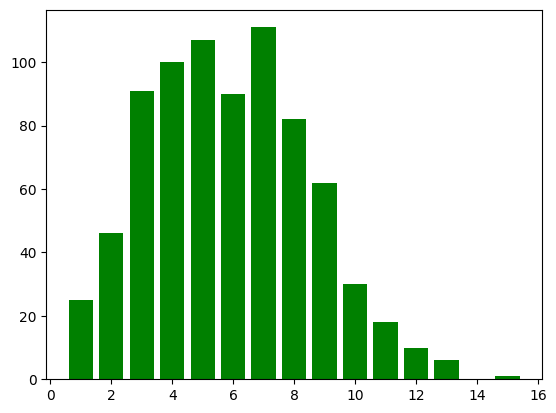

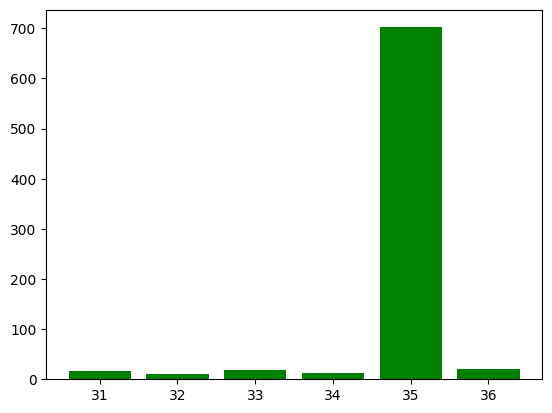

In [37]:
liste = []

for ingredient in ingredients_dict.keys():
    nb_units = len(ingredients_dict[ingredient][0])
    nb_recipies = ingredients_dict[ingredient][1]

    liste.append([ingredient,nb_units,nb_recipies])

print(liste)

nb_units_distrib = {}
nb_recipies_distrib = {}

for ingredient in ingredients_dict.keys():

    if ingredients_dict[ingredient][1] > 30:

        nb_units = len(ingredients_dict[ingredient][0])
        nb_recipies = ingredients_dict[ingredient][1]

        if nb_units in nb_units_distrib.keys():
            nb_units_distrib[nb_units] += 1

        if nb_units not in nb_units_distrib.keys():
            nb_units_distrib[nb_units] = 1
        if nb_recipies in nb_recipies_distrib.keys():
            nb_recipies_distrib[nb_recipies] += 1
        if nb_recipies not in nb_recipies_distrib.keys():
            nb_recipies_distrib[nb_recipies] = 1

print(nb_units_distrib)
print(nb_recipies_distrib)    
        
#we plot this in a histogram

import matplotlib.pyplot as plt
import numpy as np

plt.bar(nb_units_distrib.keys(), nb_units_distrib.values(), color='g')
plt.show()

plt.bar(nb_recipies_distrib.keys(), nb_recipies_distrib.values(), color='g')
plt.show()


        

In [12]:
from unidecode import unidecode
def remove_accents(input_str):
    return unidecode(input_str)

print(remove_accents('é'))


e


In [7]:
def get_soup(ingredient): # donne la soupe de la page de l'ingrédient
    ingredient_name = ingredient.lower()
    ingredient_name = ingredient_name.replace(' ','-')
    ingredient_name = remove_accents(ingredient_name)

    url = 'https://www.marmiton.org/recettes/index/ingredient/' + ingredient_name

    handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
    opener = urllib.request.build_opener(handler)
    response = opener.open(url)
    html_content = response.read()

    soup = BeautifulSoup(html_content, 'html.parser')

    return soup




    

In [8]:
def get_urls(ingredient):
    search_data = []
    articles = get_soup(ingredient).findAll("a", href=True)
    articles = [a for a in articles if a["href"].startswith("https://www.marmiton.org/recettes/recette_")]  

    iterarticles = iter(articles)
    for article in iterarticles:
        data = {}
        try:
            data["name"] = article.find("h4").get_text().strip(' \t\n\r')
            data["url"] = article['href']
            try:
                data["rate"] = article.find("span").get_text().split("/")[0]
            except Exception as e0:
                pass
            try:
                data["image"] = article.find('img')['data-src']
            except Exception as e1:
                try:
                    data["image"] = article.find('img')['src']
                except Exception as e1:
                    pass
                pass
        except Exception as e2:
            pass
        if data:
            search_data.append(data)
    return search_data


In [9]:
def get_units_and_nb_recipies(ingredient):

    urls = get_urls(ingredient)
    
    units = []
    

    nb_recipies = len(urls)

    for dicturl in urls:
        url=dicturl['url']
        unit = get_units_from_url(url,ingredient)
        if unit not in units:
            units.append(unit)

    return units,nb_recipies
    

In [10]:
def get_units_from_url(url,ingredient):

    handler = urllib.request.HTTPSHandler(context=ssl._create_unverified_context())
    opener = urllib.request.build_opener(handler)
    response = opener.open(url)
    html_content = response.read()

    soup = BeautifulSoup(html_content, 'html.parser')

    unit = soup.findAll("span", {"class": "unit"})

    #We take only the singluar name of the ingredients
    
    ingredients = soup.findAll("span", {"class": "ingredient-name"})
    ingredients = [a.get('data-ingredientnamesingular') for a in ingredients ]
    unit = [a.get_text().strip(' \t\n\r') for a in unit ]
    
    return unit[ingredients.index(ingredient)]

In [13]:
print(get_units_and_nb_recipies('abricot')[0])

['', 'g', 'kg', 'boîte']
